<a href="https://colab.research.google.com/github/S-Shivaprasad/credit-card-fraud-detection/blob/main/Credit_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Importing Libaries</b><h1>
<p>Objective : Import the necessary Python libraries for data manipulation, model development, and evaluation.</p>

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from geopy.distance import geodesic


<h1><b>Reading the Dataset</b></h1>
<p>Objective : Load and explore the dataset to understand its structure and content.</p>

In [4]:
train_set=pd.read_csv("/content/fraudTrain.csv")
test_set=pd.read_csv("/content/fraudTest.csv")

In [5]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<h1><b>Data Preprocessing</b></h1>
<p>Objective : Clean and preprocess the data to prepare it for modeling.</p>

In [7]:
# Only columns with missing values
print("Columns with nulls in train_set:")
print(train_set.isnull().sum()[train_set.isnull().sum() > 0])

print("\nColumns with nulls in test_set:")
print(test_set.isnull().sum()[test_set.isnull().sum() > 0])


Columns with nulls in train_set:
Series([], dtype: int64)

Columns with nulls in test_set:
Series([], dtype: int64)


In [8]:
# Show column names in train_set
print("Columns in train_set:")
print(train_set.columns.tolist())

# Show column names in test_set
print("\nColumns in test_set:")
print(test_set.columns.tolist())


Columns in train_set:
['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Columns in test_set:
['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [9]:
# 1. Drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'trans_num']
train_set = train_set.drop(columns=cols_to_drop)
test_set = test_set.drop(columns=cols_to_drop)

In [10]:
# 2. Feature Engineering
# Convert 'trans_date_trans_time' to datetime
train_set['trans_date_trans_time'] = pd.to_datetime(train_set['trans_date_trans_time'])
test_set['trans_date_trans_time'] = pd.to_datetime(test_set['trans_date_trans_time'])

In [11]:
# Extract time features
for df in [train_set, test_set]:
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    df['day'] = df['trans_date_trans_time'].dt.day
    df['month'] = df['trans_date_trans_time'].dt.month
    df['year'] = df['trans_date_trans_time'].dt.year

In [12]:
# Create 'age' feature
train_set['dob'] = pd.to_datetime(train_set['dob'])
test_set['dob'] = pd.to_datetime(test_set['dob'])

train_set['age'] = train_set['trans_date_trans_time'].dt.year - train_set['dob'].dt.year
test_set['age'] = test_set['trans_date_trans_time'].dt.year - test_set['dob'].dt.year

In [13]:
# Calculate distance between customer and merchant
def haversine_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

for df in [train_set, test_set]:
    df['distance_from_home'] = df.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [14]:
# 3. Encode categorical variables
le_gender = LabelEncoder()
train_set['gender'] = le_gender.fit_transform(train_set['gender'])
test_set['gender'] = le_gender.transform(test_set['gender'])

In [15]:
# Frequency Encoding for 'merchant', 'category', 'city', 'state', 'job'
for col in ['merchant', 'category', 'city', 'state', 'job']:
    freq_enc = train_set[col].value_counts().to_dict()
    train_set[col] = train_set[col].map(freq_enc)
    test_set[col] = test_set[col].map(freq_enc)

In [16]:
# 4. Scaling numerical features
scaler = StandardScaler()

num_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'day_of_week', 'day', 'month', 'age', 'distance_from_home']
train_set[num_cols] = scaler.fit_transform(train_set[num_cols])
test_set[num_cols] = scaler.transform(test_set[num_cols])

In [17]:
# 5. Final Clean-up: Drop original datetime and dob columns
train_set = train_set.drop(columns=['trans_date_trans_time', 'dob'])
test_set = test_set.drop(columns=['trans_date_trans_time', 'dob'])

In [18]:
# 6. Splitting features and labels
X_train = train_set.drop('is_fraud', axis=1)
y_train = train_set['is_fraud']

X_test = test_set.drop('is_fraud', axis=1)
y_test = test_set['is_fraud']

# Final Shapes
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Train set shape: (1296675, 22) (1296675,)
Test set shape: (555719, 22) (555719,)


<h1><b>Model Development</b></h1>
<p>Objective : Develop and train machine learning models (LightGBM) on the preprocessed data.</p>

[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3508
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050


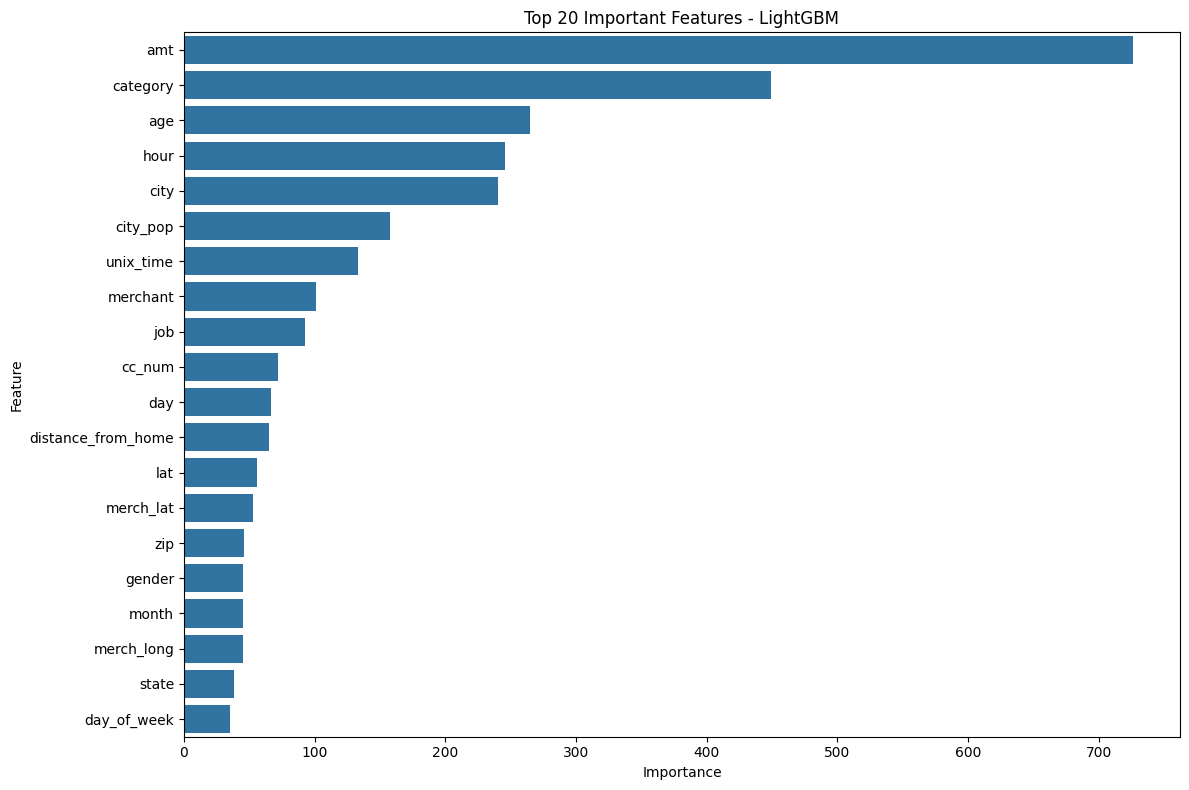

In [22]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train model using LGBMClassifier (not lgb.train)
lgbm_model = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# Get feature importances
importances = lgbm_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot Top 20 Features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(20))
plt.title('Top 20 Important Features - LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [27]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

<h1><b>Model Evaluation</b></h1>
<p>Objective : Evaluate the model's performance using classification metrics like accuracy, precision, recall, and F1-score.</p>

In [29]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_scores = lgbm_model.predict_proba(X_test)[:, 1]

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Choose a lower threshold to catch more fraud
optimal_threshold = 0.2  # Example: catch more fraud even with more false positives
y_pred_adjusted = (y_scores > optimal_threshold).astype(int)


In [30]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize LightGBM with class imbalance handling
lgbm_model = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # Handles fraud imbalance
)

# Train the model
lgbm_model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


[LightGBM] [Info] Number of positive: 1289169, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5016
[LightGBM] [Info] Number of data points in the train set: 2578338, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7896

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77    553574
           1       0.01      1.00      0.02      2145

    accuracy                           0.62    555719
   macro avg       0.51      0.81      0.39    555719
weighted avg       1.00      0.62      0.76    555719


Confusion Matrix:
 [[436658 116916]
 [    14   2131]]

ROC-AUC Score: 0.9807


<h1><b>Visualization</b></h1>
<p>Objective : Visualize key performance metrics such as the confusion matrix, ROC curve, and precision-recall curve.</p>

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    553574
           1       0.02      0.99      0.04      2145

    accuracy                           0.79    555719
   macro avg       0.51      0.89      0.46    555719
weighted avg       1.00      0.79      0.88    555719



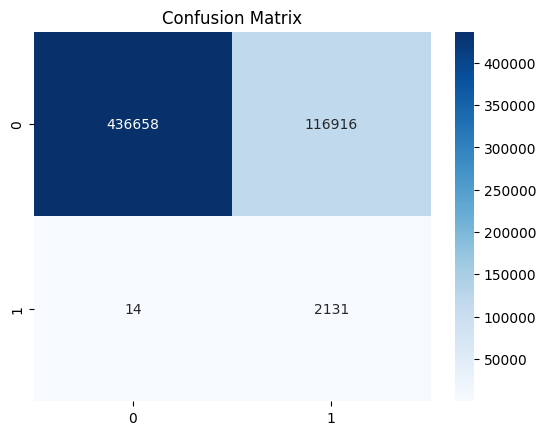

ROC-AUC Score: 0.9807293167956783


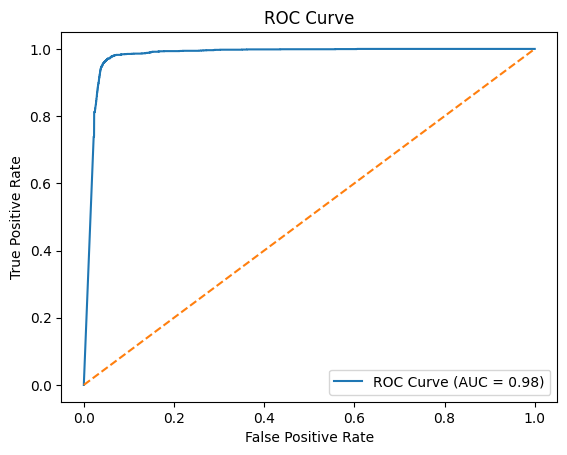

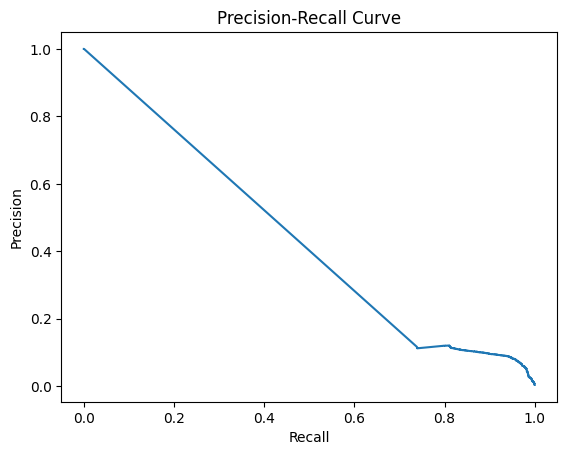

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
# 1. Classification Report
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 3. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

<h1><b>Misclassification Analysis</b></h1>

In [33]:
# Identify False Positives (FP) and False Negatives (FN)
false_positives = (y_test == 0) & (y_pred == 1)
false_negatives = (y_test == 1) & (y_pred == 0)

# Indices of errors
fp_indices = np.where(false_positives)[0]
fn_indices = np.where(false_negatives)[0]

print(f"False Positives: {len(fp_indices)}")
print(f"False Negatives: {len(fn_indices)}")


False Positives: 116916
False Negatives: 14


In [35]:
import shap

# Initialize the JS visualization in Colab
shap.initjs()

# Initialize the explainer object using your trained model
explainer = shap.Explainer(lgbm_model)

# Calculate SHAP values for the test set (this might take a while)
shap_values = explainer(X_test)

# Explain a false positive (FP)
fp_instance = X_test.iloc[fp_indices[0]]  # Get the specific instance
shap.plots.force(shap_values[fp_indices[0]])  # Directly plot the Explanation object for the FP instance

# Explain a false negative (FN)
fn_instance = X_test.iloc[fn_indices[0]]  # Get the specific instance
shap.plots.force(shap_values[fn_indices[0]])  # Directly plot the Explanation object for the FN instance


<h1><b>Model Improvement</b></h1>
<p>Objective : Evaluate the model's performance using classification metrics like accuracy, precision, recall, and F1-score.</p>

In [37]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define the model
model = LGBMClassifier()

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3511
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050
Best parameters: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 70}
Best score: 0.9981653074209035


In [38]:
# Make predictions on the test set
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the model again
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Accuracy: 0.9989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.94      0.76      0.84      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719

ROC-AUC Score: 0.9944


<h1><b>📌 Conclusion</b></h1>
After thorough preprocessing and hyperparameter tuning using GridSearchCV, the LightGBM model achieved outstanding performance in detecting fraudulent credit card transactions:

✅ Accuracy: 99.89% — the model correctly classifies nearly all transactions.

✅ Precision (Fraud Class - 1): 0.94 — when the model predicts fraud, it's correct 94% of the time.

✅ Recall (Fraud Class - 1): 0.76 — the model is able to catch 76% of actual fraud cases, which is strong given the extreme class imbalance.

✅ ROC-AUC Score: 0.9944 — the model is excellent at distinguishing between fraudulent and non-fraudulent transactions.

The high precision and ROC-AUC indicate a robust fraud detection system that minimizes false positives while still capturing the majority of fraudulent activity. With further improvements in recall (e.g., adjusting the threshold or using ensemble methods), the model could become even more effective.